<a href="https://colab.research.google.com/github/Sravani-05/Clustering-assignment/blob/main/Gaussian_mixture_models_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

**Reading Dataset**

In [3]:
dataset_path = '/content/LoanDetail.csv'
loan_ds = pd.read_csv(dataset_path, header=0)
loan_ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
data = loan_ds.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0


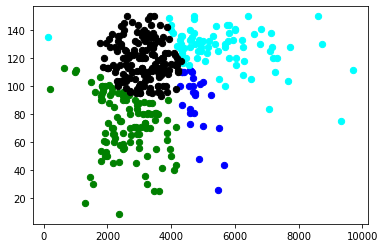

In [5]:
import sklearn.mixture
from sklearn.mixture import GaussianMixture
data = loan_ds.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)
X = data.values
gmm = GaussianMixture(n_components=4).fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k],s=40,cmap='viridis')
plt.show()

**GMM is a probabilistic model so it is possible to calculate the probability of the cluster assignment. In Scikit Learn we use the predict_proba method for this. It returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:**

In [6]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.156 0.009 0.612 0.223]
 [0.    0.981 0.    0.019]
 [0.    0.168 0.1   0.732]
 [0.    0.    0.999 0.001]
 [0.    0.586 0.007 0.407]]


**Visualizing uncertainty: by making the size of each point proportional to the certainty of its prediction**

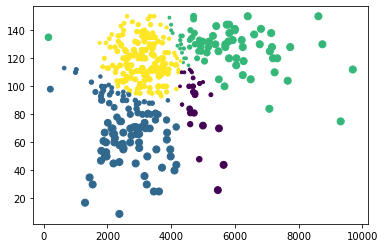

In [7]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

**Looking at the above figure, it's clear that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment.**